## 第四题 和 第五题
调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子

要求：任意两个因子，进行画图观察，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）

观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，写出信号的进出场假设

In [1]:
import warnings
from jaqs_fxdayu.data.dataservice import LocalDataService
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jaqs_fxdayu.data.hf_dataview import HFDataView

warnings.filterwarnings('ignore')
ds = LocalDataService()
start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '4H',
         'start_date':20180601000000}
Time_dict = ds.bar_reader(path,props)

In [2]:
dv = HFDataView()
dv.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


In [3]:
def plot_chart(close,alpha):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,8))
    ax.plot(close)
    ax.set_title('4H_price_time_series')
    ax1.plot(alpha)
    ax1.set_title('factor_time_series')
    plt.show()

In [4]:
def Plot_Mean(dv, alpha, chart_name='dv_alpha_ma', ShortPeriod=20, LongPeriod=60, n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,5))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(alpha.iloc[n:], alpha=0.1)
    ax1.plot(pd.Series(alpha.rolling(ShortPeriod).mean(), index=alpha.index).iloc[n:])
    ax1.plot(pd.Series(alpha.rolling(LongPeriod).mean(), index=alpha.index).iloc[n:])
    plt.show()

def Scale(df,k=1):
    return df.mul(k).div(np.abs(df).sum())

def RankPct(df):
    return df.rank(axis=1, pct=True)

1、

因子名称：技术因子 - 情绪类 AR G010001A

因子描述：人气指标（price movement indicator, compare buying power with selling power to open price)。该因子以当天开市价为基础，即以当天市价分别比较当天最高，最低价，通过一定时期内开市价在股价中的地位，反映市场买卖人气。

计算方法：AR=sum((highest-open),N)/sum((open-lowest),N)，    设N=10

In [5]:
dv.add_formula("AR_J", "Ts_Sum(high-open,10)/Ts_Sum(open-low,10)", add_data=True)

symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601040000,NaN
20180601080000,NaN
20180601120000,NaN
20180601160000,NaN
20180601200000,NaN
20180602000000,NaN
20180602040000,NaN
20180602080000,NaN


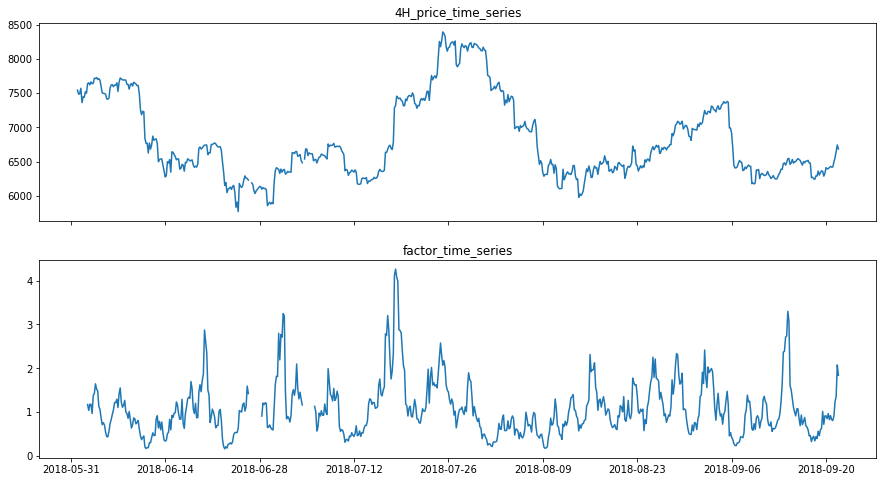

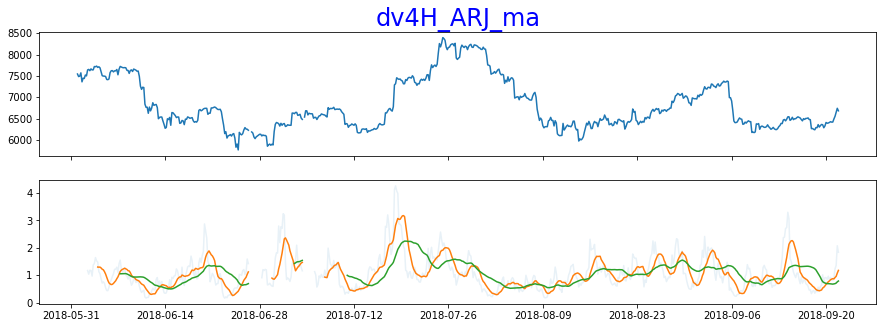

In [6]:
close = dv.get_ts('close', date_type='datetime')
AR_J = dv.get_ts('AR_J',date_type='datetime').iloc[:,0]
plot_chart(close,AR_J)
Plot_Mean(dv, AR_J, chart_name='dv4H_ARJ_ma', ShortPeriod=10, LongPeriod=30, n=0)

观察到的现象（与价格图的联系）：对比因子走势图与价格走势图可知，因子大小与价格呈同向变动，因子增大时价格呈上涨趋势，因子减小时价格呈下跌趋势。对照因子10日及30日均线图与价格走势图可知，因子均线的涨跌时间领先于价格的涨跌。

对现象的思考：当进行短期交易时，我们可以依据市场情绪的高低来做出买进卖出的决策。由于该因子的大小反映了市场上的买卖人气，且涨跌时间领先于价格的涨跌，因此我们可将其作为度量买卖人气的定量指标，当该指标呈上升趋势，即人气高涨时买入，当该指标呈下降趋势，即人气低迷时卖出。

观察到的信号：当10日均线上穿30日均线时，价格呈上涨趋势，买入信号出现。当10日均线下穿30日均线时，价格呈下降趋势，卖出信号出现。

信号假设：结合其他类似的情绪类技术因子，对这些因子的均线上穿或下穿事件进行打分加总，若加总后分数高于或低于一定阈值，则买卖信号出现

（1）进场信号： long:当这些因子的短期均线向上穿过长期均线以及前四小时的短期均线在长期均线下方时，记1分，加总后的分数若高于一定阈值时下多单。
short:当短期均线向下穿过长期均线以及前四小时的短期均线在长期均线上方时，记-1分，当加总后分数低于一定阈值时下空单。

（2）出场信号： close_long：判断当前市场是否出现新的信号可以开空单，如果空单信号出现，就平掉原来的多仓，否则继续持有多仓。
close_short：判断当前市场是否出现新的信号可以开多单，如果多单信号出现，就平掉原来的空仓，否则继续持有空仓。

2、

因子名称：技术因子 动量类 CMO E010018A

因子描述：钱德动量摆动指标（Chande Momentum Osciliator），与其他动量指标摆动指标如相对强弱指标（RSI）和随机指标（KDJ）不同，钱德动量指标在计算公式的分子中采用上涨日和下跌日的数据。

计算方法：
（1）SU是今日收盘价与昨日收盘价（上涨日）差值加总。若当日下跌，则增加值为0； 
（2）SD是今日收盘价与昨日收盘价（下跌日）差值的绝对值加总。若当日上涨，则增加值为0。 
（3）CMO = (SU - SD)/ (SU + SD) * 100.

In [7]:
dv.add_formula('SU', "Ts_Sum(If(Delta(close,1)>0,close-Delay(close, 1),0),20)", add_data=True)
dv.add_formula('SD', "Ts_Sum(If(Delta(close,1)<0,Delay(close, 1)-close,0),20)", add_data=True)
dv.add_formula('CMO_J', "(SU-SD)/(SU+SD)*100", add_data=True)

symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601040000,NaN
20180601080000,NaN
20180601120000,NaN
20180601160000,NaN
20180601200000,NaN
20180602000000,NaN
20180602040000,NaN
20180602080000,NaN


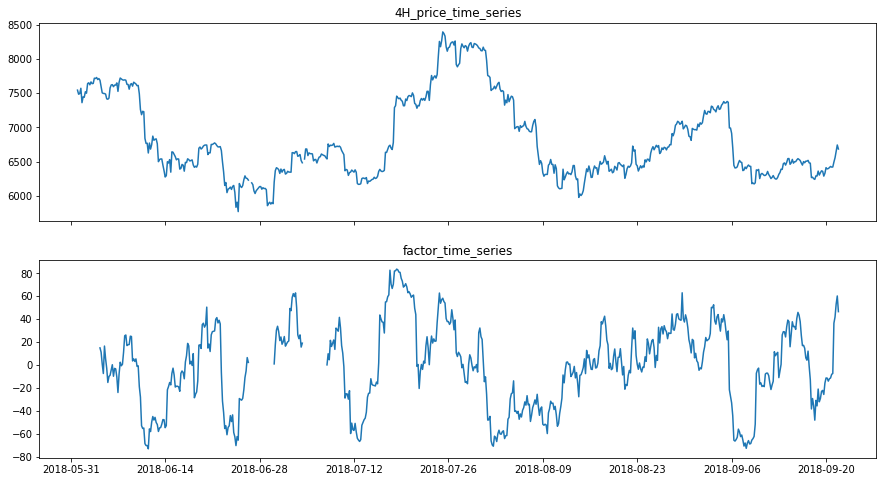

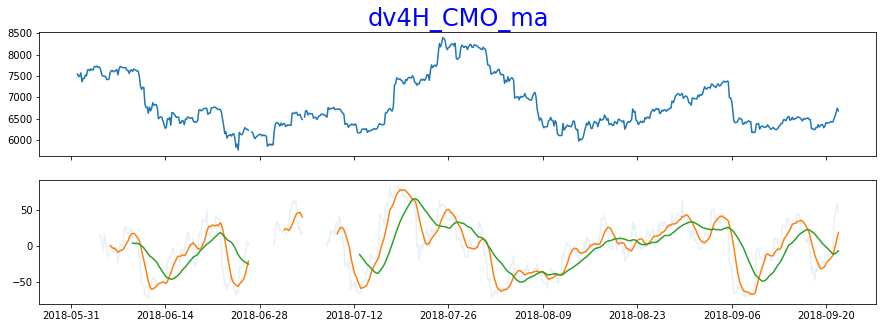

In [8]:
close = dv.get_ts('close', date_type='datetime')
CMO_J = dv.get_ts('CMO_J',date_type='datetime').iloc[:,0]
plot_chart(close,CMO_J)
Plot_Mean(dv, CMO_J, chart_name='dv4H_CMO_ma', ShortPeriod=10, LongPeriod=30, n=0)

观察到的现象：CMO的涨跌与价格的涨跌基本呈同方向变化。当CMO的绝对值越高，价格涨跌的趋势越强。当CMO的绝对值较低时，即处于0附近时，价格呈水平方向波动，并无明显趋势。对照因子10日及30日均线图与价格走势图可知，因子均线的涨跌时间领先于价格的涨跌。

对此的一些思考：由于CMO衡量了价格走势的强度，因此我们通过CMO的绝对值大小来跟踪价格的走势。在价格走势逐渐增强时买入，在价格走势逐渐减弱时卖出。

观察到的信号：当CMO为负值，且10日均线上穿30日均线时，价格开始上涨，买入信号出现；当CMO为正值且10日均线下穿30日均线时，价格开始下跌，卖出信号出现

信号假设：

（1）进场信号： long:当短期均线向上穿过长期均线，且前四小时的短期均线在长期均线下方，且两条均线都小于0时，下多单。
               short:当短期均线向下穿过长期均线，且前四小时的短期均线在长期均线上方，且两条均线都大于0时，下空单。

（2）出场信号： close_long：判断当前市场是否出现新的信号可以开空单，如果空单信号出现，就平掉原来的多仓，否则继续持有多仓。
close_short：判断当前市场是否出现新的信号可以开多单，如果多单信号出现，就平掉原来的空仓，否则继续持有空仓。